In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Gender_Female      10000 non-null  bool   
 13  Gender_Male        10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


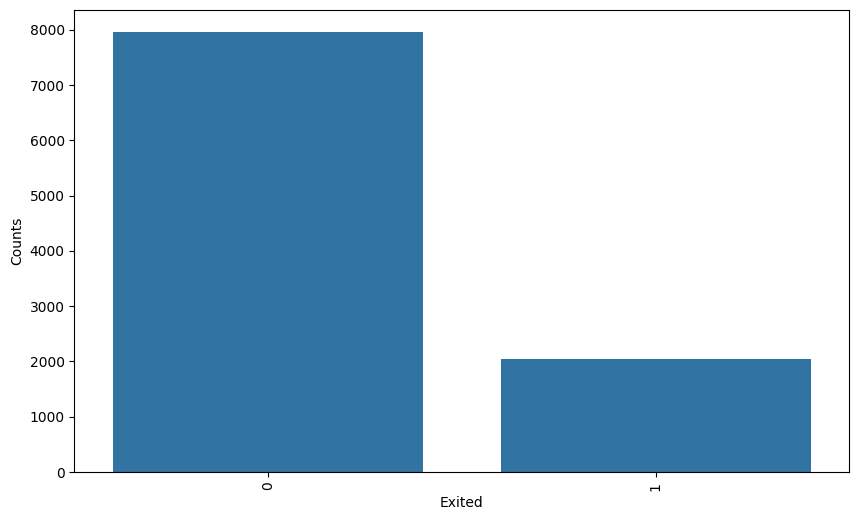

In [3]:
data = pd.read_csv('./dataset/Churn_Modelling.csv').dropna(axis=1)
data.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)
data = pd.get_dummies(data, columns=['Geography', 'Gender'])
data.info()

churn_count = data['Exited'].value_counts()
temp_df = pd.DataFrame({
    'Exited':churn_count.index,
    'Counts': churn_count.values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


In [5]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_test.shape)
print(X_val.shape)

(1000, 13)
(1000, 13)


In [6]:
def cv_scoring(estimator, X, y): 
    return accuracy_score(y, estimator.predict(X)) 
  
models = { 
    "SVC":SVC(), 
    "Gaussian NB":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18) 
} 
  
for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, X, y, cv = 10,  
                             n_jobs = -1,  
                             scoring = cv_scoring) 
    print("=="*30) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.545 0.545 0.545 0.546 0.546 0.546 0.546 0.546 0.546 0.546]
Mean Score: 0.5457000000000001
Gaussian NB
Scores: [0.619 0.591 0.619 0.603 0.639 0.613 0.614 0.616 0.607 0.592]
Mean Score: 0.6113
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


From the above output we notice that our Random Forest Classifier is performing very well and the mean score after K-fold Cross Validation is also very high, so we will fill the data on Random Forest Classifier Algorithm.

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


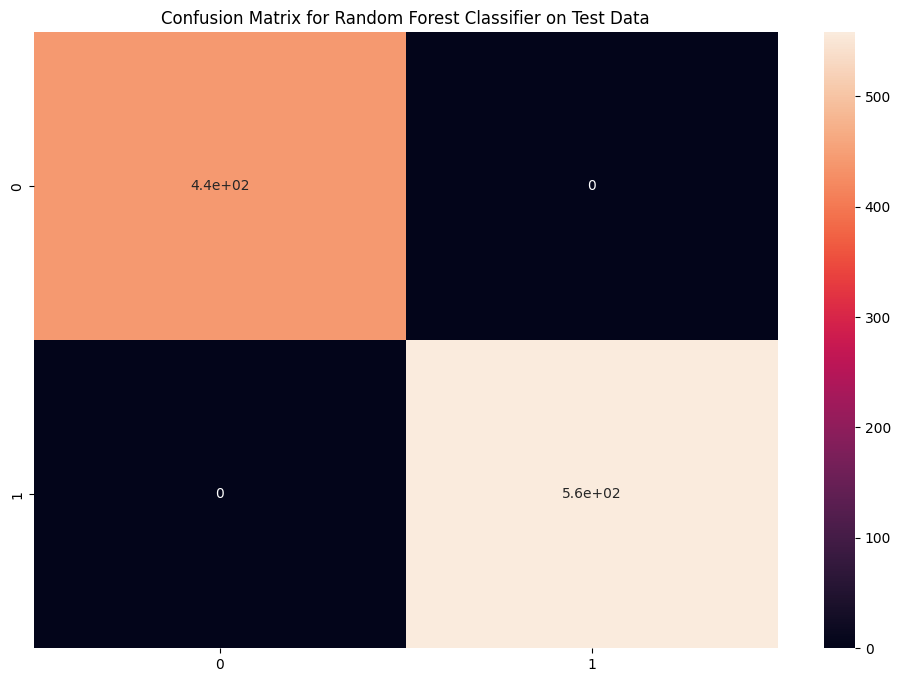

In [7]:
rf_model = RandomForestClassifier(random_state=18) 
rf_model.fit(X_train, y_train) 
preds = rf_model.predict(X_val) 
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}") 
  
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_val, preds)*100}") 
  
cf_matrix = confusion_matrix(y_val, preds) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for Random Forest Classifier on Test Data") 
plt.show()

Accuracy of the model on test dataset: 1.0
Confusion Matrix:
[[463   0]
 [  0 537]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       463
        True       1.00      1.00      1.00       537

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



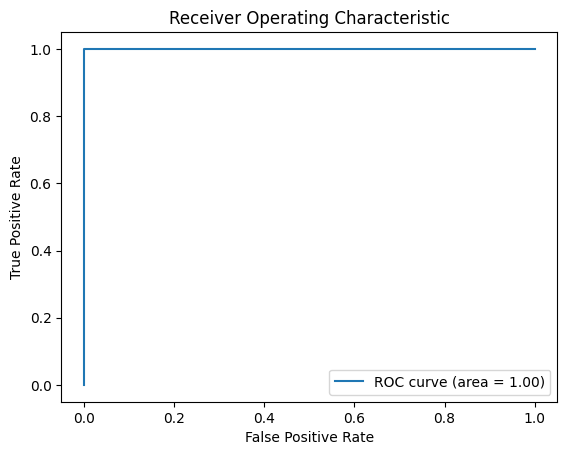

In [8]:
y_pred = rf_model.predict(X_test)
print(f"Accuracy of the model on test dataset: {accuracy_score(y_test, y_pred)}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

#Classification Report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

#ROC Curve and AUC
y_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()